In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Part 1

In [2]:
symbols = ['AAPL', 'SPY']
start_date = "2018-10-01"
end_date = "2023-10-01"

data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')
closing_prices=data[[('AAPL','Adj Close'),('SPY','Adj Close')]]
monthly_closing_prices = closing_prices.resample('M').ffill()

returns = pd.DataFrame()
returns['AAPL'] = monthly_closing_prices['AAPL'].pct_change().dropna()
returns['SPY'] = monthly_closing_prices['SPY'].pct_change().dropna()

[*********************100%%**********************]  2 of 2 completed


Linear Regression

In [3]:
x = sm.add_constant(returns['SPY'])
model = sm.OLS(returns['AAPL'], x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     80.84
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.60e-12
Time:                        16:39:36   Log-Likelihood:                 83.429
No. Observations:                  59   AIC:                            -162.9
Df Residuals:                      57   BIC:                            -158.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.008      1.324      0.1

In [10]:
slope = model.params['SPY']
intercept = model.params['const']
mse = model.mse_resid

print("Slope:", round(slope,4))
print("Intercept:", round(intercept,4))
print("Mean Squared Error:", round(mse,4))

Slope: 1.3061
Intercept: 0.0105
Mean Squared Error: 0.0036


Perform k-NN regression

In [11]:
X = returns['SPY'].values.reshape(-1, 1)
y = returns['AAPL'].values
 
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)
y_pred_knn = knn.predict(X)

In [12]:
mse_knn = mean_squared_error(y, y_pred_knn)
print("Mean Squared Error of k-NN Model (k=5):", round(mse_knn,4))

Mean Squared Error of k-NN Model (k=5): 0.0001


no predict

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


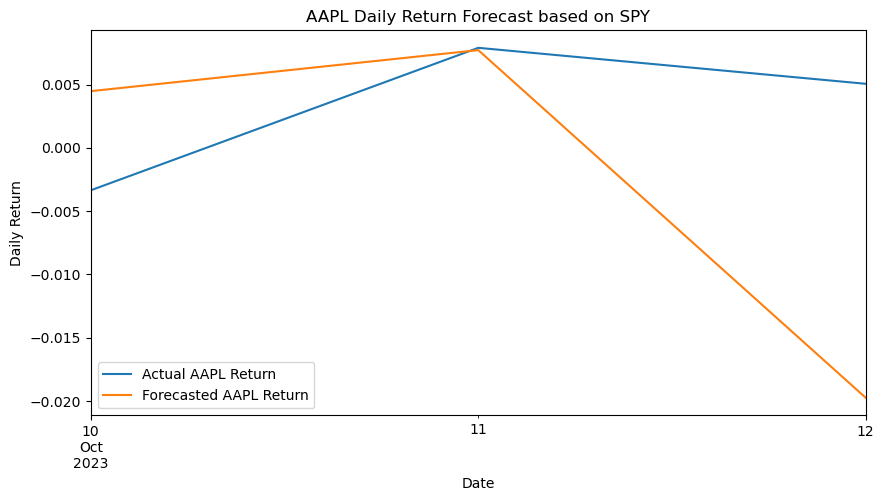

In [13]:
start_date = '2023-10-09'
end_date = '2023-10-13'

aapl_daily = yf.download('AAPL', start=start_date, end=end_date)
spy_daily = yf.download('SPY', start=start_date, end=end_date)

aapl_daily['Daily_Return'] = aapl_daily['Adj Close'].pct_change().dropna()
spy_daily['Daily_Return'] = spy_daily['Adj Close'].pct_change().dropna()
aapl_daily = aapl_daily.dropna()
spy_daily = spy_daily.dropna()
X_daily = spy_daily['Daily_Return'].values.reshape(-1, 1)
aapl_daily['AAPL_Forecast'] = knn.predict(X_daily)

plt.figure(figsize=(10, 5))
aapl_daily['Daily_Return'].plot(label='Actual AAPL Return')
aapl_daily['AAPL_Forecast'].plot(label='Forecasted AAPL Return')
plt.title('AAPL Daily Return Forecast based on SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

5-NN that uses daily returns

In [14]:
symbols = ['AAPL', 'SPY']
start_date = "2018-10-01"
end_date = "2023-10-01"

data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')
closing_prices=data[[('AAPL','Adj Close'),('SPY','Adj Close')]]
daily_closing_prices = closing_prices.resample('D').ffill()

returns = pd.DataFrame()
returns['AAPL'] = daily_closing_prices['AAPL'].pct_change().dropna()
returns['SPY'] = daily_closing_prices['SPY'].pct_change().dropna()

[*********************100%%**********************]  2 of 2 completed


In [19]:
X = returns['SPY'].values.reshape(-1, 1)
y = returns['AAPL'].values
 
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)
y_pred_knn = knn.predict(X)

mse_knn = mean_squared_error(y, y_pred_knn)
print("Mean Squared Error of k-NN Model (k=5):", round(mse_knn,6))

Mean Squared Error of k-NN Model (k=5): 8.6e-05


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


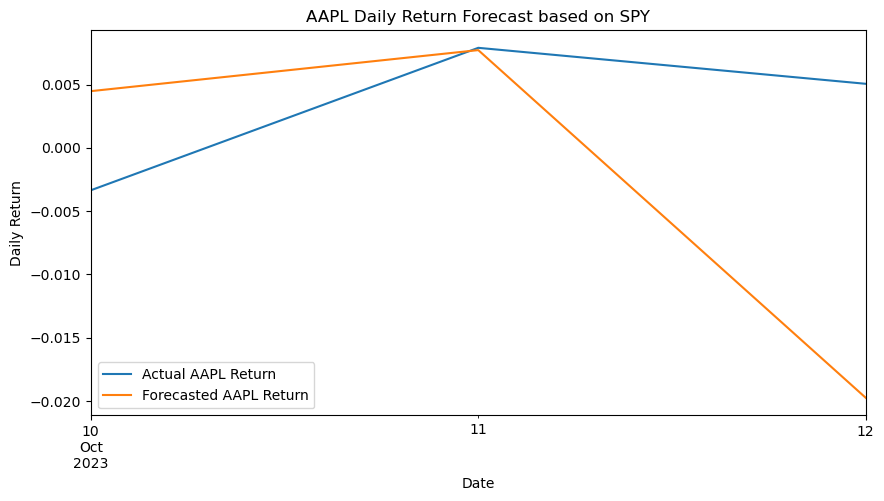

In [16]:
start_date = '2023-10-09'
end_date = '2023-10-13'

aapl_daily = yf.download('AAPL', start=start_date, end=end_date)
spy_daily = yf.download('SPY', start=start_date, end=end_date)

aapl_daily['Daily_Return'] = aapl_daily['Adj Close'].pct_change().dropna()
spy_daily['Daily_Return'] = spy_daily['Adj Close'].pct_change().dropna()
aapl_daily = aapl_daily.dropna()
spy_daily = spy_daily.dropna()
X_daily = spy_daily['Daily_Return'].values.reshape(-1, 1)
aapl_daily['AAPL_Forecast'] = knn.predict(X_daily)

plt.figure(figsize=(10, 5))
aapl_daily['Daily_Return'].plot(label='Actual AAPL Return')
aapl_daily['AAPL_Forecast'].plot(label='Forecasted AAPL Return')
plt.title('AAPL Daily Return Forecast based on SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

10-NN that uses daily returns

In [18]:
X = returns['SPY'].values.reshape(-1, 1)
y = returns['AAPL'].values
 
k = 10
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)
y_pred_knn = knn.predict(X)

mse_knn = mean_squared_error(y, y_pred_knn)
print("Mean Squared Error of k-NN Model (k=10):", round(mse_knn,6))

Mean Squared Error of k-NN Model (k=10): 9.6e-05


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


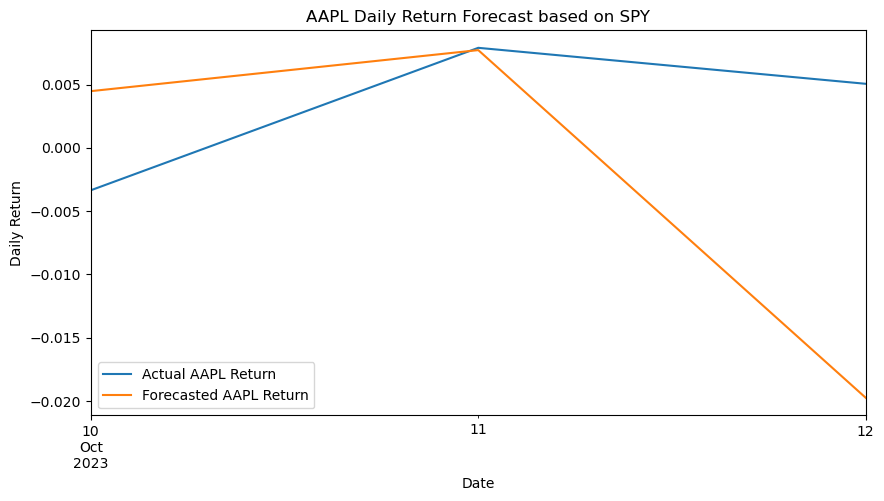

In [20]:
start_date = '2023-10-09'
end_date = '2023-10-13'

aapl_daily = yf.download('AAPL', start=start_date, end=end_date)
spy_daily = yf.download('SPY', start=start_date, end=end_date)

aapl_daily['Daily_Return'] = aapl_daily['Adj Close'].pct_change().dropna()
spy_daily['Daily_Return'] = spy_daily['Adj Close'].pct_change().dropna()
aapl_daily = aapl_daily.dropna()
spy_daily = spy_daily.dropna()
X_daily = spy_daily['Daily_Return'].values.reshape(-1, 1)
aapl_daily['AAPL_Forecast'] = knn.predict(X_daily)

plt.figure(figsize=(10, 5))
aapl_daily['Daily_Return'].plot(label='Actual AAPL Return')
aapl_daily['AAPL_Forecast'].plot(label='Forecasted AAPL Return')
plt.title('AAPL Daily Return Forecast based on SPY')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()